In [18]:
import math
import random
from matplotlib import pyplot as plt
import time

In [19]:
class ACO:
    class Edge:
        def __init__(self, a, b, weight, initial_pheromone):
            self.a = a
            self.b = b
            self.weight = weight
            self.pheromone = initial_pheromone

    class Ant:
        def __init__(self, alpha, beta, num_nodes, edges):
            self.alpha = alpha
            self.beta = beta
            self.num_nodes = num_nodes
            self.edges = edges
            self.tour = None
            self.distance = 0.0

        def select_node(self):
            roulette_wheel = 0.0
            unvisited_nodes = [node for node in range(self.num_nodes) if node not in self.tour]
            heuristic_total = 0.0
            for unvisited_node in unvisited_nodes:
                heuristic_total += self.edges[self.tour[-1]][unvisited_node].weight
            for unvisited_node in unvisited_nodes:
                roulette_wheel += pow(self.edges[self.tour[-1]][unvisited_node].pheromone, self.alpha) * \
                                  pow((heuristic_total / self.edges[self.tour[-1]][unvisited_node].weight), self.beta)
            random_value = random.uniform(0.0, roulette_wheel)
            wheel_position = 0.0
            for unvisited_node in unvisited_nodes:
                wheel_position += pow(self.edges[self.tour[-1]][unvisited_node].pheromone, self.alpha) * \
                                  pow((heuristic_total / self.edges[self.tour[-1]][unvisited_node].weight), self.beta)
                if wheel_position >= random_value:
                    return unvisited_node

        def find_tour(self):
            self.tour = [random.randint(0, self.num_nodes - 1)]
            while len(self.tour) < self.num_nodes:
                self.tour.append(self.select_node())
            return self.tour

        def get_distance(self):
            self.distance = 0.0
            for i in range(self.num_nodes):
                self.distance += self.edges[self.tour[i]][self.tour[(i + 1) % self.num_nodes]].weight
            return self.distance

    def __init__(self, colony_size=10, elitist_weight=1.0, min_scaling_factor=0.001, alpha=1.0, beta=3.0,
                 rho=0.1, pheromone_deposit_weight=1.0, initial_pheromone=1.0, steps=100, nodes=None, labels=None):
        self.colony_size = colony_size
        self.elitist_weight = elitist_weight
        self.min_scaling_factor = min_scaling_factor
        self.rho = rho
        self.pheromone_deposit_weight = pheromone_deposit_weight
        self.steps = steps
        self.num_nodes = len(nodes)
        self.nodes = nodes
        if labels is not None:
            self.labels = labels
        else:
            self.labels = range(1, self.num_nodes + 1)
        self.edges = [[None] * self.num_nodes for _ in range(self.num_nodes)]
        for i in range(self.num_nodes):
            for j in range(i + 1, self.num_nodes):
                self.edges[i][j] = self.edges[j][i] = self.Edge(i, j, math.sqrt(
                    pow(self.nodes[i][0] - self.nodes[j][0], 2.0) + pow(self.nodes[i][1] - self.nodes[j][1], 2.0)),
                                                                initial_pheromone)
        self.ants = [self.Ant(alpha, beta, self.num_nodes, self.edges) for _ in range(self.colony_size)]
        self.global_best_tour = None
        self.global_best_distance = float("inf")

    def add_pheromone(self, tour, distance, weight=1.0):
        pheromone_to_add = self.pheromone_deposit_weight / distance
        for i in range(self.num_nodes):
            self.edges[tour[i]][tour[(i + 1) % self.num_nodes]].pheromone += weight * pheromone_to_add

    def algo(self):
        for step in range(self.steps):
            for ant in self.ants:
                self.add_pheromone(ant.find_tour(), ant.get_distance())
                if ant.distance < self.global_best_distance:
                    self.global_best_tour = ant.tour
                    self.global_best_distance = ant.distance
            for i in range(self.num_nodes):
                for j in range(i + 1, self.num_nodes):
                    self.edges[i][j].pheromone *= (1.0 - self.rho)

    def run(self):
        t_start = time.time()
        self.algo()
        t_end = time.time()
        t = t_end - t_start 
        
        print("Time elapsed in seconds: ", t) 
        print('Total distance travelled to complete the tour : {0}\n'.format(round(self.global_best_distance, 2)))

    def plot(self, line_width=1, point_radius=math.sqrt(2.0), annotation_size=8, dpi=120):
        x = [self.nodes[i][0] for i in self.global_best_tour]
        x.append(x[0])
        y = [self.nodes[i][1] for i in self.global_best_tour]
        y.append(y[0])
        plt.plot(x, y, linewidth=line_width)
        plt.scatter(x, y, s=math.pi * (point_radius ** 2.0))
        plt.title('ACO')
        for i in self.global_best_tour:
            plt.annotate(self.labels[i], self.nodes[i], size=annotation_size)
        plt.show()
        plt.gcf().clear()

[(109, 161), (187, 142), (146, 152), (99, 62), (184, 153), (117, 88), (5, 88), (161, 58), (26, 56), (179, 104), (108, 39), (191, 12), (62, 87), (174, 74), (170, 148), (116, 104), (91, 22), (12, 152), (2, 7), (35, 41)]
Time elapsed in seconds:  0.06599831581115723
Total distance travelled to complete the tour : 890.89



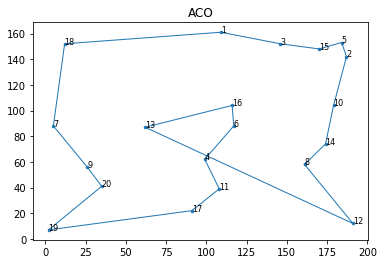

<Figure size 432x288 with 0 Axes>

In [20]:
#1
colony_size = 5
steps = 50
nodes = [(109,161), (187,142), (146,152), (99,62), (184,153), (117,88), (5,88), (161,58), (26,56), (179,104), (108,39), (191,12), (62,87), (174,74), (170,148), (116,104), (91,22), (12,152), (2,7), (35,41)]
print(nodes)
aco = ACO(colony_size=colony_size, steps=steps, nodes=nodes)
aco.run()
aco.plot()

[(106, 101), (98, 26), (88, 8), (32, 11), (111, 29), (180, 166), (29, 196), (182, 156), (42, 121), (30, 96), (101, 156), (98, 56), (198, 158), (53, 118), (58, 84), (124, 22), (193, 80), (89, 105), (3, 179), (74, 197)]
Time elapsed in seconds:  0.07599854469299316
Total distance travelled to complete the tour : 901.05



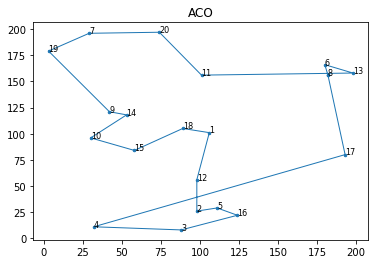

<Figure size 432x288 with 0 Axes>

In [21]:
#2
colony_size = 5
steps = 50
nodes = [(106,101), (98,26), (88,8), (32,11), (111,29), (180,166), (29,196), (182,156), (42,121), (30,96), (101,156), (98,56), (198,158), (53,118), (58,84), (124,22), (193,80), (89,105), (3,179), (74,197)]
print(nodes)
aco = ACO(colony_size=colony_size, steps=steps, nodes=nodes)
aco.run()
aco.plot()

[(46, 186), (63, 90), (77, 40), (68, 148), (117, 53), (122, 183), (86, 68), (123, 75), (67, 87), (153, 178), (138, 11), (24, 76), (66, 41), (113, 199), (126, 35), (198, 106), (40, 146), (52, 22), (16, 144), (174, 106)]
Time elapsed in seconds:  0.08399558067321777
Total distance travelled to complete the tour : 777.2



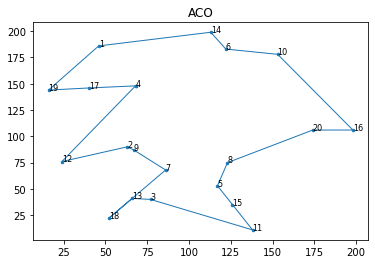

<Figure size 432x288 with 0 Axes>

In [22]:
#3
colony_size = 5
steps = 50
nodes = [(46,186), (63,90), (77,40), (68,148), (117,53), (122,183), (86,68), (123,75), (67,87), (153,178), (138,11), (24,76), (66,41), (113,199), (126,35), (198,106), (40,146), (52,22), (16,144), (174,106)]
print(nodes)
aco = ACO(colony_size=colony_size, steps=steps, nodes=nodes)
aco.run()
aco.plot()